# Face Detection - การค้นหาใบหน้า
การค้นหาใบหน้าจากรูปภาพด้วยวิธี Haar-cascade classifier

## การ mount ไดเรกทรอรี่จาก google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## แสดงข้อมูลที่อยู่ในไดเรกทรอรี่

In [2]:
! ls '/content/drive/My Drive/Colab Notebooks/image/'

pic-01.jpg  pic-03.jpg	pic-05.jpg  pic-07.jpg	pic-09.jpg
pic-02.jpg  pic-04.jpg	pic-06.jpg  pic-08.jpg


## อ่านและแสดงรูปภาพด้วยไลบรารี่ของ Scikit-image

/content/drive/My Drive/Colab Notebooks/image/pic-01.jpg


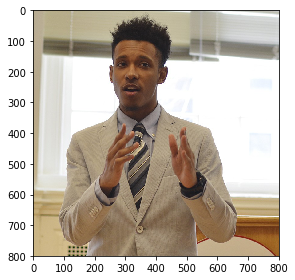

In [34]:
from skimage import io

loc = '/content/drive/My Drive/Colab Notebooks/image/'
image_name = 'pic-01.jpg'

image_loc = loc + image_name
print(image_loc)

img = io.imread(image_loc)

io.imshow(img)
io.show()

## อ่านรูปภาพด้วย OpenCV และแสดงรูปภาพด้วย matplotlib

/content/drive/My Drive/Colab Notebooks/image/pic-01.jpg


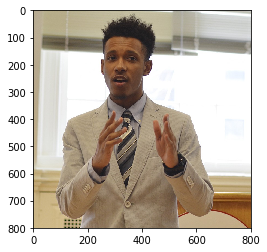

In [43]:
import cv2 as cv
import matplotlib.pyplot as plt

loc = '/content/drive/My Drive/Colab Notebooks/image/'
image_name = 'pic-01.jpg'

image_loc = loc + image_name
print(image_loc)

image = cv.imread(image_loc, 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = np.array(image)

plt.imshow(image)
plt.show()

## แสดงรูปภาพในรูปแบบสีเทา

/content/drive/My Drive/Colab Notebooks/image/pic-01.jpg


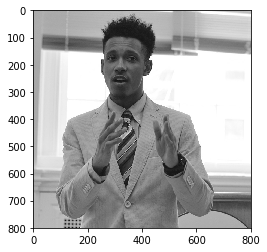

In [46]:
import matplotlib.pyplot as plt
import cv2 as cv

loc = '/content/drive/My Drive/Colab Notebooks/image/'
image_name = 'pic-01.jpg'

image_loc = loc + image_name
print(image_loc)

gray = cv.imread(image_loc, 0)

plt.gray()
plt.imshow(gray)
plt.show()

## คัดลอกรูปภาพด้วยไลบรารี่ของ numpy

In [0]:
import numpy as np

face_img = np.copy(img)

## ดาวน์โหลดโมเดลใบหน้าที่สร้างด้วยวิธี Haar-Cascade Classifier

In [7]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-08-19 15:33:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2019-08-19 15:33:06 (11.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [9]:
!ls

drive  haarcascade_frontalface_default.xml  sample_data


## ค้นหาใบหน้าด้วยวิธี Haar-Cascade Classifier

Detected Face: 1
face location and size 233 106 182 182


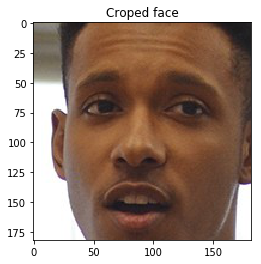

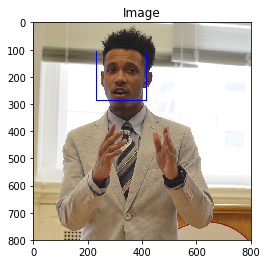

In [48]:
import matplotlib.pyplot as plt
import cv2 as cv

# Haar cascade classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# อ่านรูปภาพ
loc = '/content/drive/My Drive/Colab Notebooks/image/'
image_name = 'pic-01.jpg'
image_loc = loc + image_name

# อ่านรูปภาพแบบสีเทา
gray = cv.imread(image_loc, 0)

# ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
gray = np.array(gray, dtype='uint8')
faces = face_cascade.detectMultiScale(gray, 1.3, 5, 0)
print('Detected Face:', len(faces))

# วาดกรอบสี่เหลี่ยมรอบใบหน้า
for (x,y,w,h) in faces:
  print("face location and size", x,y,w,h)
  cv.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),2)
  crop_img = img[y:y+h, x:x+w]
  plt.title('Croped face')
  plt.imshow(crop_img)
  plt.show()

plt.title('Image')
plt.imshow(face_img)
plt.show()

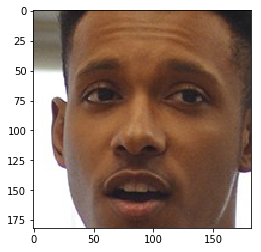

In [49]:
# ครอปใบหน้า image[y1:y2, x1:x2]
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()

## ค้นหาใบหน้าจากรูปภาพทั้งหมดในไดเรกทรอรี่

### สร้างฟังก์ชันการอ่านข้อมูลรูปภาพจากไดเรกทรอรี่

In [67]:
import os

def read_file_from_directory(path):
  files = []
  # r=root, d=directories, f = files
  for r, d, f in os.walk(path):
    for file in f:
      if (('.png' in file) or ('.jpg' in file)) :
        files.append(os.path.join(r, file))

  return files

path = '/content/drive/My Drive/Colab Notebooks/image/'
files = read_file_from_directory(path)
for f in files:
    print(f)

/content/drive/My Drive/Colab Notebooks/image/pic-03.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-02.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-05.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-06.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-08.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-07.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-09.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-04.jpg
/content/drive/My Drive/Colab Notebooks/image/pic-01.jpg


### สร้างฟังก์ชันการค้นหาและแสดงใบหน้า

In [0]:
def face_detection_haarcascade(gray, img):
  
  # ค้นหาใบหน้า ต้องใช้รูปภาพสีเทาในการหา
  gray = np.array(gray, dtype='uint8')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5, 0)
  print('Detected Face:', len(faces))

  # วาดกรอบสี่เหลี่ยมรอบใบหน้า
  for (x,y,w,h) in faces:
    print("face location and size", x,y,w,h)
    
    crop_img = img[y:y+h, x:x+w]
    plt.title('Croped face')
    plt.imshow(crop_img)
    plt.show()

### อ่านข้อมูลรูปภาพและค้นหาใบหน้า

Image:  1
Detected Face: 1
face location and size 303 66 142 142


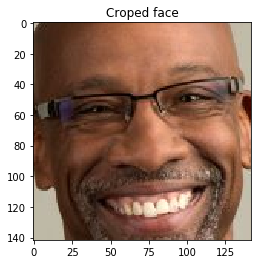

Image:  2
Detected Face: 1
face location and size 383 180 452 452


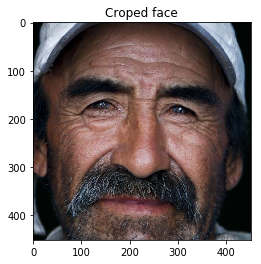

Image:  3
Detected Face: 1
face location and size 176 36 97 97


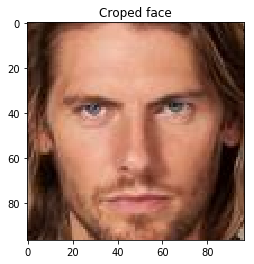

Image:  4
Detected Face: 1
face location and size 751 185 290 290


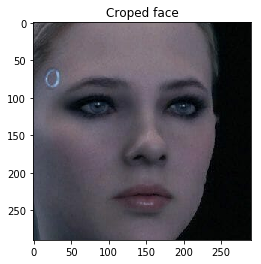

Image:  5
Detected Face: 2
face location and size 50 40 39 39


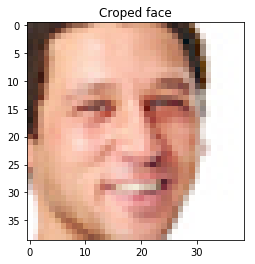

face location and size 391 56 32 32


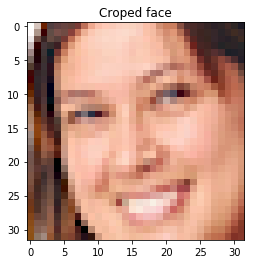

Image:  6
Detected Face: 2
face location and size 472 136 179 179


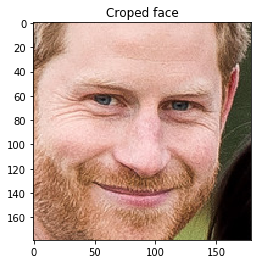

face location and size 623 260 178 178


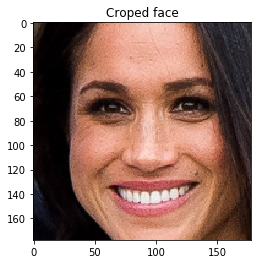

Image:  7
Detected Face: 1
face location and size 99 46 27 27


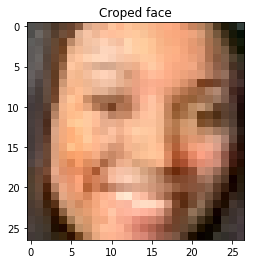

Image:  8
Detected Face: 1
face location and size 2340 2758 110 110


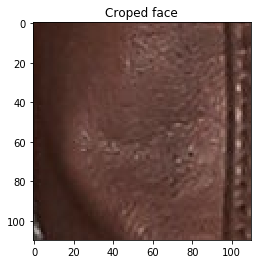

Image:  9
Detected Face: 1
face location and size 236 110 176 176


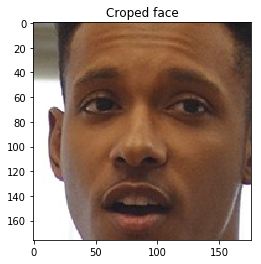

In [64]:
path = '/content/drive/My Drive/Colab Notebooks/image/'
files = read_file_from_directory(path)

cnt = 1
for f in files:
  print('='*30)
  print('Image: ', cnt)
  image = cv.imread(f, 1)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  image = np.array(image)
  
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  face_detection_haarcascade(gray, image)
  cnt += 1